In [1]:
import pandas as pd
import numpy as np
import os
os.chdir(os.path.dirname(os.getcwd()))
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set('talk')
sns.set_style("ticks")
sns.set_color_codes()
%matplotlib inline

# Base load data exploration

In [2]:
loads = pd.read_excel('data/environment/loads.xlsx',header=0)

In [3]:
loads

,Date,Hours,DK1,DK2,DK,string_date
0,2014-01-01 00:00:00,00 - 01,1838.0,1436.0,3274.0,01/01/2014
1,2014-01-01 00:00:00,01 - 02,1763.0,1408.0,3171.0,01/01/2014
2,2014-01-01 00:00:00,02 - 03,1698.0,1345.0,3043.0,01/01/2014
3,2014-01-01 00:00:00,03 - 04,1663.0,1300.0,2963.0,01/01/2014
4,2014-01-01 00:00:00,04 - 05,1604.0,1275.0,2879.0,01/01/2014
...,...,...,...,...,...,...
8756,31-12-2014,19 - 20,2267.0,1783.0,4050.0,31-12-2014
8757,31-12-2014,20 - 21,2070.0,1617.0,3687.0,31-12-2014
8758,31-12-2014,21 - 22,2019.0,1565.0,3584.0,31-12-2014
8759,31-12-2014,22 - 23,1962.0,1503.0,3465.0,31-12-2014


In [3]:
loads = loads.rename(columns={'Unnamed: 0':'Date'})
loads['hour'] = loads['Hours'].map(lambda x: x.split('-')[0].strip())

In [4]:
def extract_date(x,column):
    if column == 1:
        try: 
            return x.split('/')[1]
        except: 
            return x.split('-')[1]
    else:
        try: 
            x.split('/')[1]
            return x.split('/')[0]
        except: 
            return x.split('-')[0]
loads['year']='2014'
loads['month']=loads['string_date'].map(lambda x: extract_date(x,1))
loads['day']=loads['string_date'].map(lambda x: extract_date(x,0))

In [5]:
loads

,Date,Hours,DK1,DK2,DK,string_date,hour,year,month,day
0,2014-01-01 00:00:00,00 - 01,1838.0,1436.0,3274.0,01/01/2014,00,2014,01,01
1,2014-01-01 00:00:00,01 - 02,1763.0,1408.0,3171.0,01/01/2014,01,2014,01,01
2,2014-01-01 00:00:00,02 - 03,1698.0,1345.0,3043.0,01/01/2014,02,2014,01,01
3,2014-01-01 00:00:00,03 - 04,1663.0,1300.0,2963.0,01/01/2014,03,2014,01,01
4,2014-01-01 00:00:00,04 - 05,1604.0,1275.0,2879.0,01/01/2014,04,2014,01,01
...,...,...,...,...,...,...,...,...,...,...
8756,31-12-2014,19 - 20,2267.0,1783.0,4050.0,31-12-2014,19,2014,12,31
8757,31-12-2014,20 - 21,2070.0,1617.0,3687.0,31-12-2014,20,2014,12,31
8758,31-12-2014,21 - 22,2019.0,1565.0,3584.0,31-12-2014,21,2014,12,31
8759,31-12-2014,22 - 23,1962.0,1503.0,3465.0,31-12-2014,22,2014,12,31


In [6]:
loads['date'] = pd.to_datetime(loads[['year','month','day','hour']])
loads

,Date,Hours,DK1,DK2,DK,string_date,hour,year,month,day,date
0,2014-01-01 00:00:00,00 - 01,1838.0,1436.0,3274.0,01/01/2014,00,2014,01,01,2014-01-01 00:00:00
1,2014-01-01 00:00:00,01 - 02,1763.0,1408.0,3171.0,01/01/2014,01,2014,01,01,2014-01-01 01:00:00
2,2014-01-01 00:00:00,02 - 03,1698.0,1345.0,3043.0,01/01/2014,02,2014,01,01,2014-01-01 02:00:00
3,2014-01-01 00:00:00,03 - 04,1663.0,1300.0,2963.0,01/01/2014,03,2014,01,01,2014-01-01 03:00:00
4,2014-01-01 00:00:00,04 - 05,1604.0,1275.0,2879.0,01/01/2014,04,2014,01,01,2014-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...
8756,31-12-2014,19 - 20,2267.0,1783.0,4050.0,31-12-2014,19,2014,12,31,2014-12-31 19:00:00
8757,31-12-2014,20 - 21,2070.0,1617.0,3687.0,31-12-2014,20,2014,12,31,2014-12-31 20:00:00
8758,31-12-2014,21 - 22,2019.0,1565.0,3584.0,31-12-2014,21,2014,12,31,2014-12-31 21:00:00
8759,31-12-2014,22 - 23,1962.0,1503.0,3465.0,31-12-2014,22,2014,12,31,2014-12-31 22:00:00


In [7]:
loads = loads.fillna(method='ffill')

In [8]:
print(sum(loads['DK'])/3448*1000)
print(sum(loads['DK1'])/3448*1000)
print(sum(loads['DK2'])/3448*1000)

9717866.009280743
5841504.350348027
3876332.0765661253


In [8]:
loads['DK2_scaled'] = loads['DK2']/(sum(loads['DK2'])/9244)/1000

In [10]:
start = pd.to_datetime('2014-11-01',infer_datetime_format=True)
end = pd.to_datetime('2014-12-31',infer_datetime_format=True)
loads.loc[loads['date'] >= start,'DK2_scaled']

7297    0.000819
7298    0.000768
7299    0.000739
7300    0.000728
7301    0.000728
          ...   
8756    0.001233
8757    0.001118
8758    0.001082
8759    0.001040
8760    0.001002
Name: DK2_scaled, Length: 1464, dtype: float64

In [40]:
loads['DK2_scaled'].to_csv('2014_DK2_scaled_loads.csv')

In [11]:
loads['DK2_scaled_1'] = loads['DK2_scaled']*1000 + np.random.normal(loc=0.0, scale=0.075, size=len(loads))
loads['DK2_scaled_2'] = loads['DK2_scaled']*1000 + np.random.normal(loc=0.0, scale=0.075, size=len(loads))

In [42]:
start = pd.to_datetime('2014-01-01',infer_datetime_format=True)
end = pd.to_datetime('2014-01-07',infer_datetime_format=True)
jan = loads.loc[(loads['date'] <= end) & (loads['date'] >= start)]
jan.index = jan['date']
jan['DK2_scaled'] *= 1000

<ipython-input-42-0e92c3763163>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jan['DK2_scaled'] *= 1000


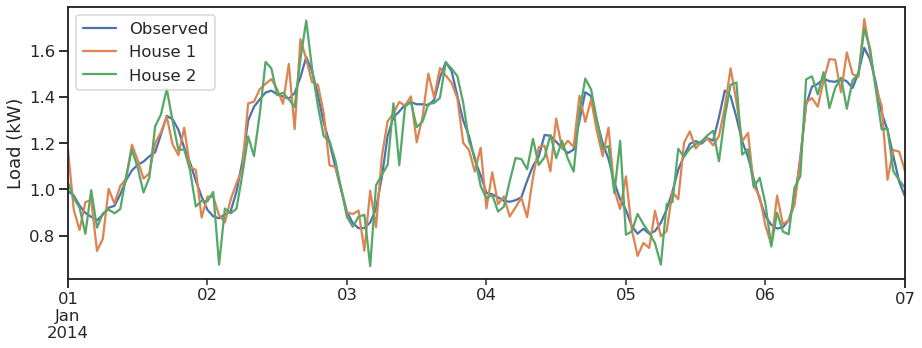

In [44]:
f, ax = plt.subplots(figsize=(15,5))

plt.ylabel('Load (kW)')
jan['DK2_scaled'].plot(ax=ax)
jan['DK2_scaled_1'].plot(ax=ax)
jan['DK2_scaled_2'].plot(ax=ax)

ax.legend(['Observed','House 1', 'House 2'])
plt.xlabel('')
plt.savefig('data/output/Input_base_loads.png',bbox_inches='tight')

Text(0.5, 0, '')

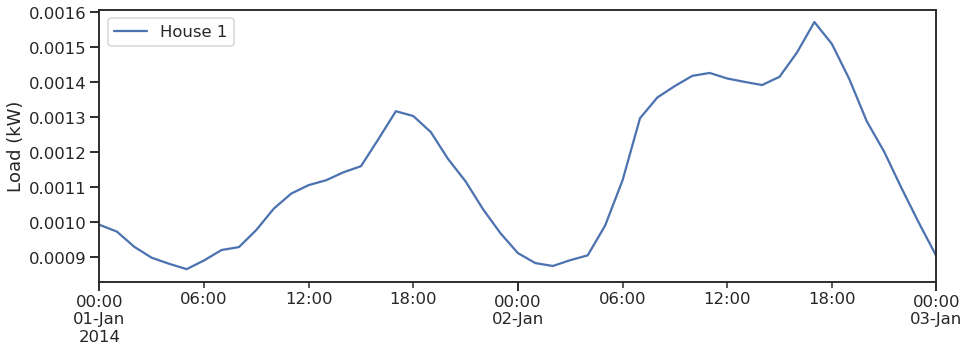

In [18]:
f, ax = plt.subplots(figsize=(15,5))

plt.ylabel('Load (kW)')
jan['DK2_scaled'].plot(ax=ax)
#jan['DK2_scaled_2'].plot(ax=ax)

ax.legend(['House 1'])
plt.xlabel('')
#plt.savefig('data/output/Input_base_loads.png',bbox_inches='tight')

# Definition of ToU prices for benchmarking

In [31]:
time_of_use_prices = pd.DataFrame()
time_of_use_prices['date'] = loads['date']
time_of_use_prices['hour'] = loads['hour']

In [39]:
price_mapping_dict = {
    '00':20,
    '01':20,
    '02':20,
    '03':20,
    '04':20,
    '05':20,
    '06':20,
    '07':30,
    '08':30,
    '09':30,
    '10':30,
    '11':30,
    '12':30,
    '13':30,
    '14':30,
    '15':40,
    '16':40,
    '17':40,
    '18':40,
    '19':30,
    '20':30,
    '21':30,
    '22':20,
    '23':20,
}

def price_mapping(x):
    return price_mapping_dict[x]

time_of_use_prices['price'] = time_of_use_prices['hour'].map(lambda x: price_mapping(x))

In [40]:
time_of_use_prices.loc[(loads['date'] <= end) & (loads['date'] >= start)]

,date,hour,price
48,2014-01-03 00:00:00,00,20
49,2014-01-03 01:00:00,01,20
50,2014-01-03 02:00:00,02,20
51,2014-01-03 03:00:00,03,20
52,2014-01-03 04:00:00,04,20
53,2014-01-03 05:00:00,05,20
54,2014-01-03 06:00:00,06,20
55,2014-01-03 07:00:00,07,30
56,2014-01-03 08:00:00,08,30
57,2014-01-03 09:00:00,09,30


In [41]:
time_of_use_prices['price'].to_csv('2014_ToU_prices.csv')